In [1]:
%load_ext autoreload
import uproot as ut
import utils
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

from utils.cutConfig import *
%autoreload 2

In [2]:
filename = "../signal/NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_accstudies_500k_May2021.root:sixBtree"
ttree = ut.open(filename)
branches = utils.Branches(ttree)

In [3]:
baseline_selection = utils.Selection(branches,scheme={"njetcut":6},variable="jet_btag",njets=-1,tag="baseline")

--- baseline captured btag ordered jets ---
Event  Efficiency:     0.6
Signal Efficiency:     0.74
Signal Purity:         0.45
Event  Total Selected: 92.79%
Signal Total Selected: 91.59%
Event  Avg Selected:   4.92 -> 92.79%
Signal Avg Selected:   5.50 -> 91.59%
Event  Avg Captured:   4.92 -> 92.79%
Signal Avg Captured:   5.50 -> 91.59%


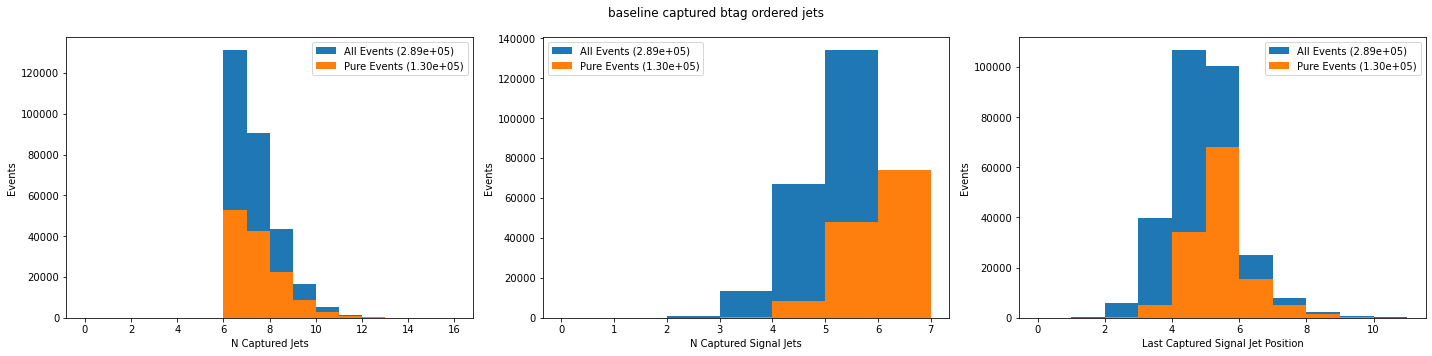

In [4]:
plot_info = {
    "branches":branches,
    "plot":1,
    "selection":baseline_selection,
    "title":f"baseline captured btag ordered jets",
    "saveas":"baseline_selection_btag"
}
utils.njet_study(**plot_info)

In [5]:
wpmap = ["loose","medium","tight"]
btag_selection_list = [ 
    utils.Selection(branches,variable="jet_btag",njets=-1,
                   scheme={"njetcut":0,"btagcut":jet_btagWP[i]},
                   previous=baseline_selection,tag=f"{wpmap[i]} btag")
    for i in range(3)
]

--- baseline & loose btag captured btag ordered Jets ---
Event  Efficiency:     0.6
Signal Efficiency:     0.74
Signal Purity:         0.45
Event  Total Selected: 84.66%
Signal Total Selected: 83.48%
Event  Avg Selected:   4.49 -> 84.66%
Signal Avg Selected:   5.01 -> 83.48%
Event  Avg Captured:   4.49 -> 84.66%
Signal Avg Captured:   5.01 -> 83.48%


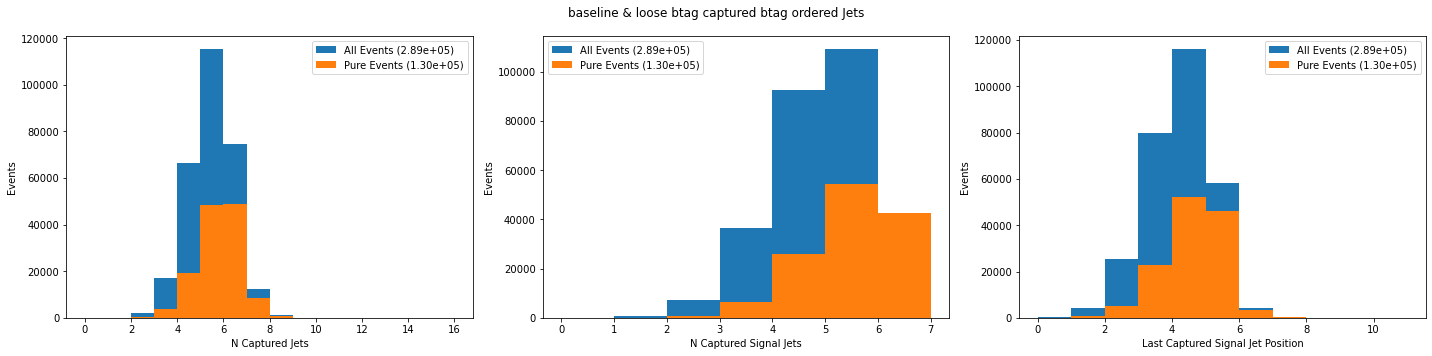

--- baseline & medium btag captured btag ordered Jets ---
Event  Efficiency:     0.6
Signal Efficiency:     0.74
Signal Purity:         0.45
Event  Total Selected: 75.08%
Signal Total Selected: 73.93%
Event  Avg Selected:   3.98 -> 75.08%
Signal Avg Selected:   4.44 -> 73.93%
Event  Avg Captured:   3.98 -> 75.08%
Signal Avg Captured:   4.44 -> 73.93%


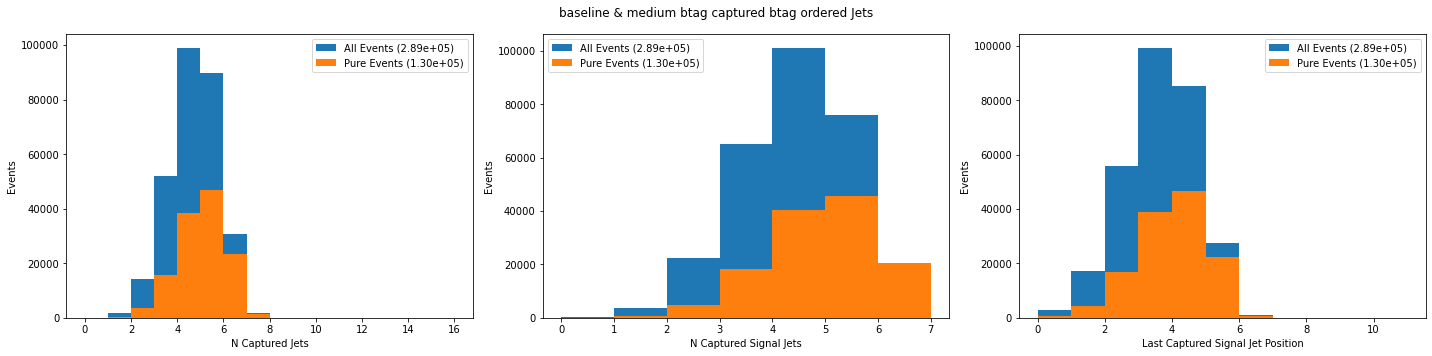

--- baseline & tight btag captured btag ordered Jets ---
Event  Efficiency:     0.6
Signal Efficiency:     0.74
Signal Purity:         0.45
Event  Total Selected: 59.77%
Signal Total Selected: 58.66%
Event  Avg Selected:   3.17 -> 59.77%
Signal Avg Selected:   3.52 -> 58.66%
Event  Avg Captured:   3.17 -> 59.77%
Signal Avg Captured:   3.52 -> 58.66%


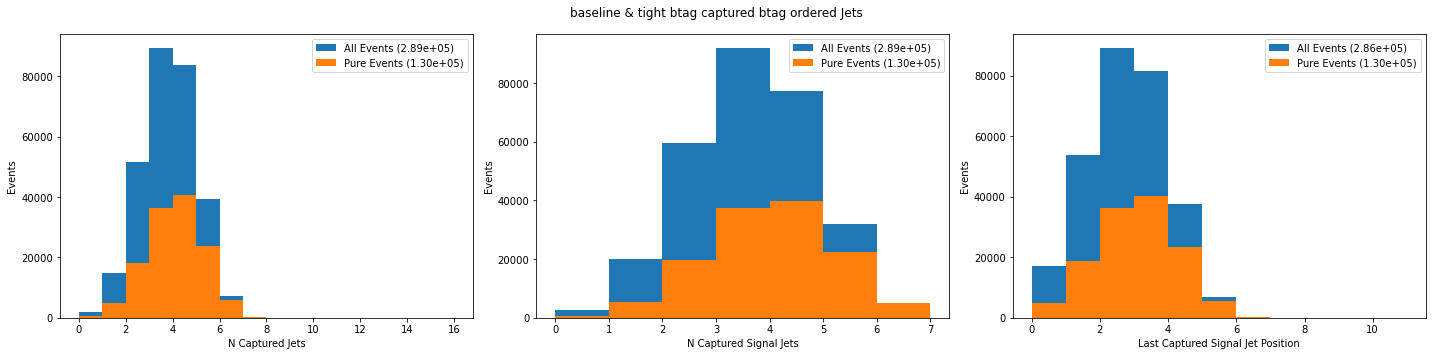

In [6]:
for selection in btag_selection_list:
    tag = selection.tag.replace(" ","_")
    plot_info = {
        "branches":branches,
        "plot":1,
        "selection":selection,
        "title":f"{selection.merge().tag} captured btag ordered Jets",
        "saveas":f"{tag}_selection_btag"
    }
    utils.njet_study(**plot_info)
    

In [7]:
scheme = {"njetcut":2,"njets":2,"btagcut":jet_btagWP[tightWP],"tag":"tight btag"}

first_selection = utils.Selection(branches,variable="jet_btag",njets=scheme["njets"],scheme=scheme,
                            previous=baseline_selection,tag=f"{scheme['njets']} {scheme['tag']}")


In [8]:
scheme = {"njetcut":2,"njets":2,"btagcut":jet_btagWP[looseWP],"tag":"loose btag"}
second_selection = utils.Selection(branches,variable="jet_btag",njets=scheme["njets"],scheme=scheme,
                            previous=first_selection,exclude=True,tag=f"{scheme['njets']} {scheme['tag']}")

In [9]:
scheme = {"njetcut":2,"njets":4,"btagcut":None,"tag":"no btag"}
third_selection = utils.Selection(branches,variable="jet_btag",njets=scheme["njets"],scheme=scheme,
                            previous=second_selection,exclude=True,tag=f"{scheme['njets']} {scheme['tag']}")

In [10]:
merged_selection = third_selection.merge()

--- baseline & 2 tight btag & 2 loose btag & 4 no btag captured btag ordered Jets ---
Event  Efficiency:     0.53
Signal Efficiency:     0.69
Signal Purity:         0.47
Event  Total Selected: 91.15%
Signal Total Selected: 89.27%
Event  Avg Selected:   4.87 -> 91.15%
Signal Avg Selected:   5.36 -> 89.27%
Event  Avg Captured:   5.01 -> 93.60%
Signal Avg Captured:   5.54 -> 92.27%


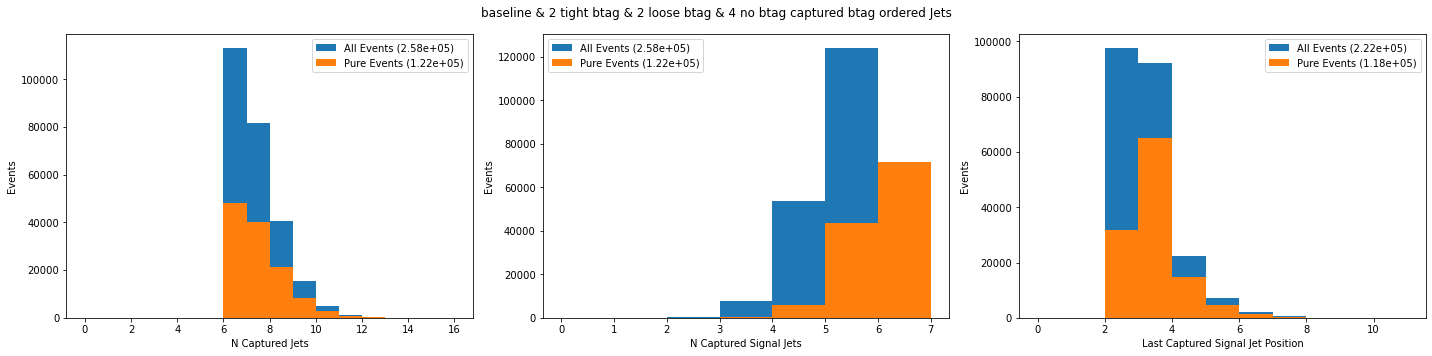

In [16]:
for i,selection in enumerate((first_selection,second_selection,third_selection,merged_selection)):
    if i != 3: continue
    tag = selection.tag.replace(" ","_") if i != 3 else "merged"
    plot_info = {
        "branches":branches,
        "plot":1,
        "selection":selection,
        "title":f"{selection.tag} captured btag ordered Jets",
        "saveas":f"{tag}_step_selection_btag"
    }
    utils.njet_study(**plot_info)
#     utils.presel_study(**plot_info,print_score=0)

In [12]:
wp_map = ["loose","medium","tight"]
presel_selection = [
    utils.Selection(branches,variable="jet_btag",njets=6,scheme={"njetcut":6,"btagcut":jet_btagWP[i]},tag=f"presel {wp_map[i]}")
    for i in range(3)
]

--- presel loose captured btag ordered Jets ---
Event  Efficiency:     0.18
Signal Efficiency:     0.33
Signal Purity:         0.66
Event  Total Selected: 94.35%
Signal Total Selected: 94.03%
Event  Avg Selected:   5.30 -> 94.35%
Signal Avg Selected:   5.64 -> 94.03%
Event  Avg Captured:   5.35 -> 95.31%
Signal Avg Captured:   5.70 -> 95.06%


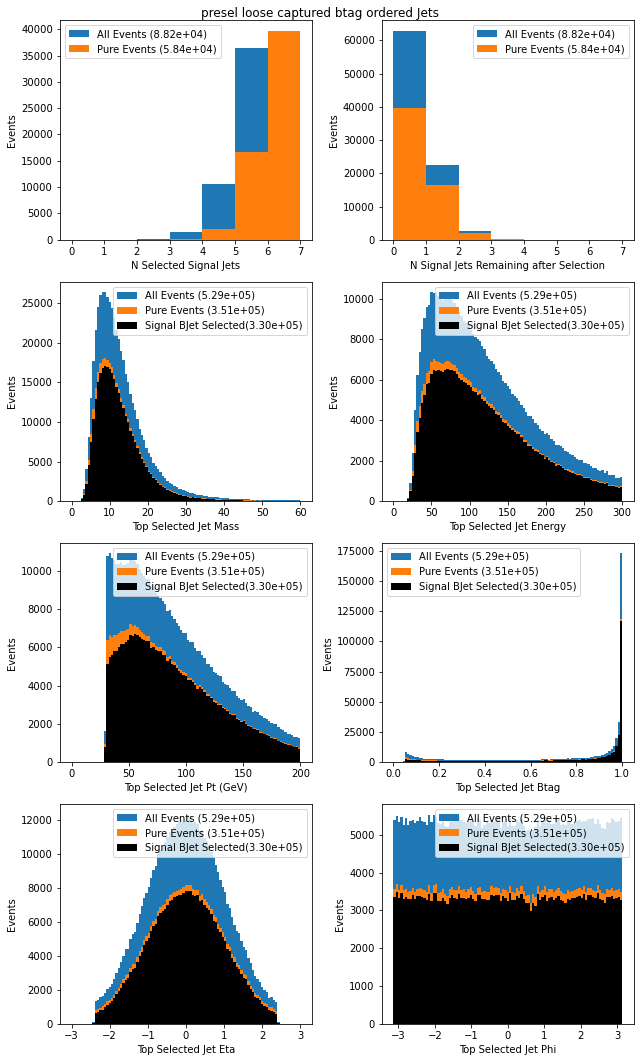

--- presel medium captured btag ordered Jets ---
Event  Efficiency:     0.067
Signal Efficiency:     0.14
Signal Purity:         0.77
Event  Total Selected: 96.22%
Signal Total Selected: 96.26%
Event  Avg Selected:   5.52 -> 96.22%
Signal Avg Selected:   5.78 -> 96.26%
Event  Avg Captured:   5.56 -> 96.80%
Signal Avg Captured:   5.81 -> 96.82%


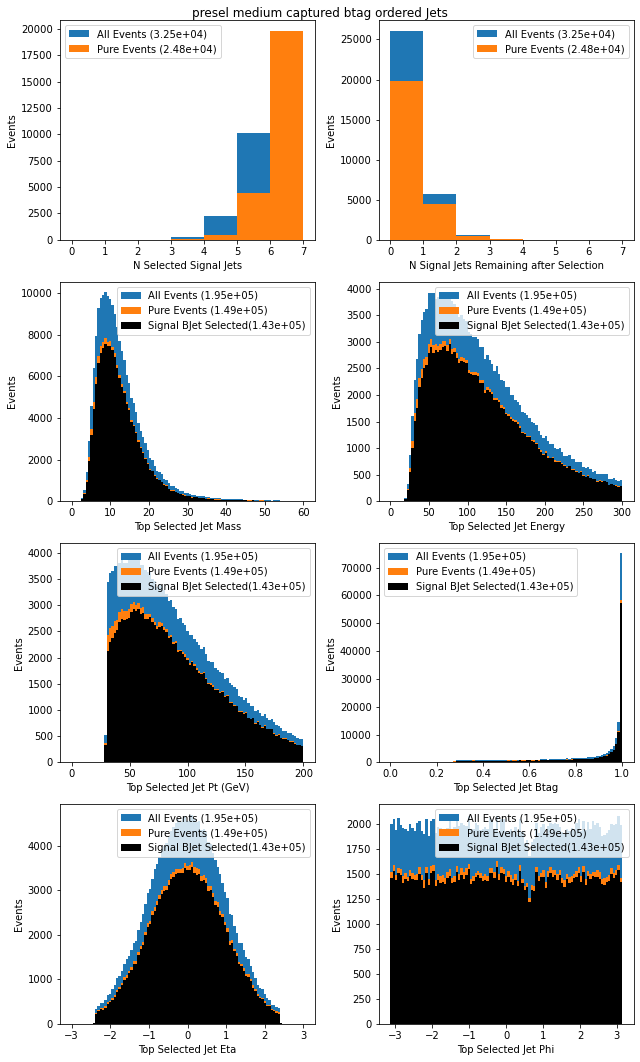

--- presel tight captured btag ordered Jets ---
Event  Efficiency:     0.016
Signal Efficiency:     0.03
Signal Purity:         0.80
Event  Total Selected: 96.58%
Signal Total Selected: 96.75%
Event  Avg Selected:   5.58 -> 96.58%
Signal Avg Selected:   5.80 -> 96.75%
Event  Avg Captured:   5.60 -> 96.96%
Signal Avg Captured:   5.83 -> 97.10%


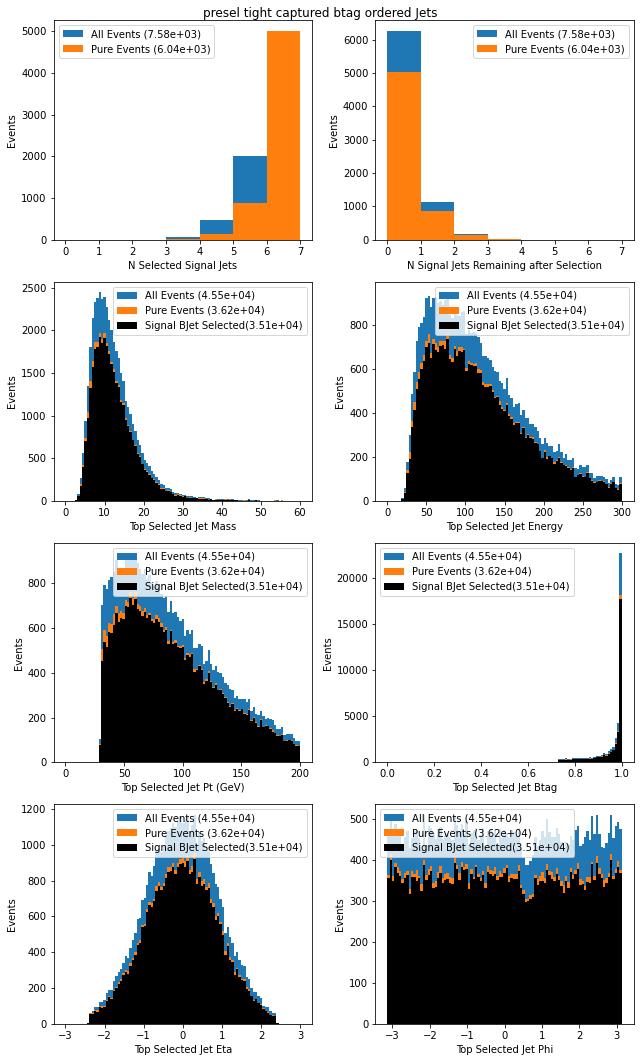

In [13]:
for i,selection in enumerate(presel_selection):
    tag = selection.tag.replace(" ","_")
    plot_info = {
        "branches":branches,
        "plot":1,
        "selection":selection,
        "title":f"{selection.tag} captured btag ordered Jets",
        "saveas":f"{tag}_presel_selection_btag"
    }
    
    utils.presel_study(**plot_info)